In [4]:
import IPython.display as ipd
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

import pandas as pd

In [5]:
def get_frame_results(result, frame):
    frame_res = pd.DataFrame(result['emotion'], index=[0])
    frame_res['dombinant_emotion'] = result['dominant_emotion']
    frame_res['age'] = result['age']
    frame_res['dominant_race'] = result['dominant_race']
    frame_res['gender'] = result['gender']
    frame_res['frame'] = frame
    return frame_res

In [6]:
from tqdm import trange

In [ ]:
cap = cv2.VideoCapture('Amber Heard vs Johnny Depp Comparison of Depositions.mp4')

ret, img = cap.read()
max_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
dfs = []
for frame in trange(max_frame):
    if ret is False:
        break
    else:
        ret, img = cap.read()

    # if frame < 2_400:
    #     continue
    # elif frame > 7530:
    #     continue
    if frame % 60 == 0:
        try:
            result = DeepFace.analyze(img, actions=['emotion', 'age', 'gender','race'], prog_bar=False)
            dfs.append(get_frame_results(result, frame))
        except ValueError as e:
            pass
cap.release()

In [10]:
plt.imshow(img)

In [14]:
# %load_ext lab_black

<AxesSubplot:xlabel='frame'>

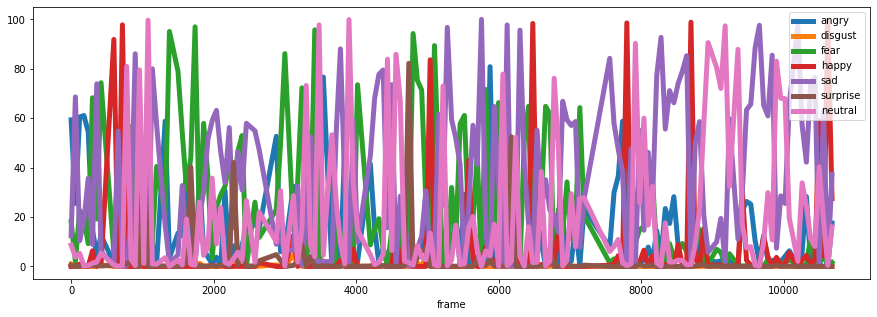

In [13]:
result_df = pd.concat(dfs)

result_df.set_index('frame')[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']] \
    .plot(figsize=(15, 5),
          lw=5)
# results_amber.set_index('frame')['sad'].plot(figsize=(15, 5))

<AxesSubplot:title={'center':'Amber'}, xlabel='frame'>

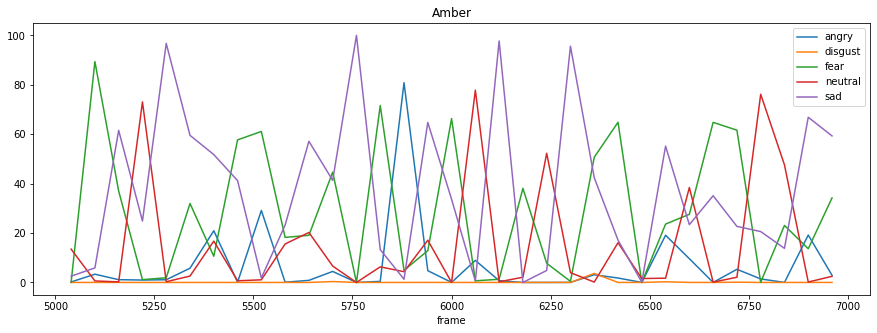

In [31]:
result_df.query('frame > 5000 and frame < 7000').set_index('frame') \
    [['angry', 'disgust', 'fear','neutral','sad']].plot(figsize=(15, 5), title='Amber')

<AxesSubplot:title={'center':'Amber'}, xlabel='frame'>

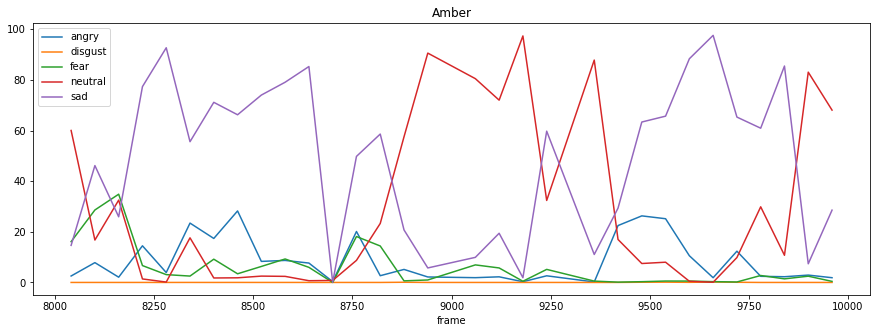

In [32]:
result_df.query('frame > 8000 and frame < 10000').set_index('frame') \
    [['angry', 'disgust', 'fear','neutral','sad']].plot(figsize=(15, 5), title='Amber')

In [33]:
# results_amber.head()

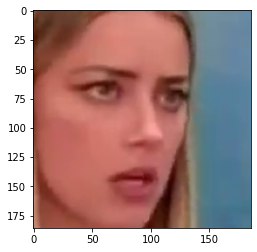

In [188]:
img_out = img[result['region']['y']:result['region']['y']+result['region']['w'],
              result['region']['x']:(result['region']['x']+result['region']['h']),
              :]

plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))

# Johnny

In [189]:
cap = cv2.VideoCapture('Amber Heard vs Johnny Depp Comparison of Depositions.mp4')

ret, img = cap.read()
dfs = []
for frame in trange(100_000):
    if ret is False:
        break
    else:
        ret, img = cap.read()

    if frame < 7530:
        continue
    try:
        result = DeepFace.analyze(img, actions=['emotion', 'age', 'gender','race'], prog_bar=False)
        dfs.append(get_frame_results(result, frame))
    except ValueError as e:
        pass
cap.release()

  7%|▋         | 7490/100000 [00:06<01:22, 1121.04it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 7490/100000 [00:24<01:22, 1121.04it/s]

1/1 [==============================] - 0s 128ms/step


  8%|▊         | 7557/100000 [00:24<1:24:51, 18.15it/s]

1/1 [==============================] - 0s 135ms/step


  8%|▊         | 7558/100000 [00:25<1:29:03, 17.30it/s]

1/1 [==============================] - 0s 130ms/step


  8%|▊          | 7563/100000 [00:29<05:55, 259.69it/s]


KeyboardInterrupt: 

In [195]:
# plt.imshow(img)

<AxesSubplot:xlabel='frame'>

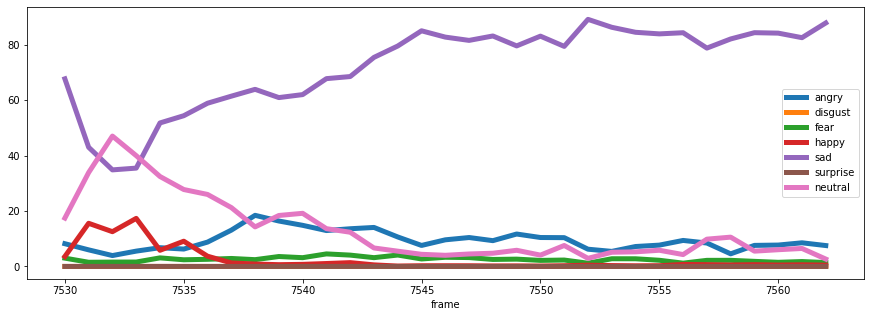

In [193]:
results_johnny = pd.concat(dfs)

results_johnny.set_index('frame')[['angry', 'disgust', 'fear',
                                   'happy', 'sad', 'surprise', 'neutral']] \
    .plot(figsize=(15, 5),
          lw=5)
# results_amber.set_index('frame')['sad'].plot(figsize=(15, 5))

# Johhny Depp Data